In [3]:
import numpy as np
import psychopy
from skimage.external import tifffile
from psychopy.monitors import GammaCalculator
%matplotlib notebook
import matplotlib.pyplot as plt
import os

In [2]:
px = 512
framerate = 30
trial_length = 1
n_trials = 41
offset = 10
trial_frames = framerate * trial_length
lum_values = np.linspace(0, 256, n_trials)

In [6]:
folderPath = 'V:\\users\\Aaron\\170628_ScreenCalib\\'
basePath = os.path.join(folderPath, 'base1_00001.tif')
base = tifffile.imread(basePath)

In [10]:
baseAvg = base.mean(axis=(1,2))
base_median = np.median(base)
base_median

-46.0

<IPython.core.display.Javascript object>


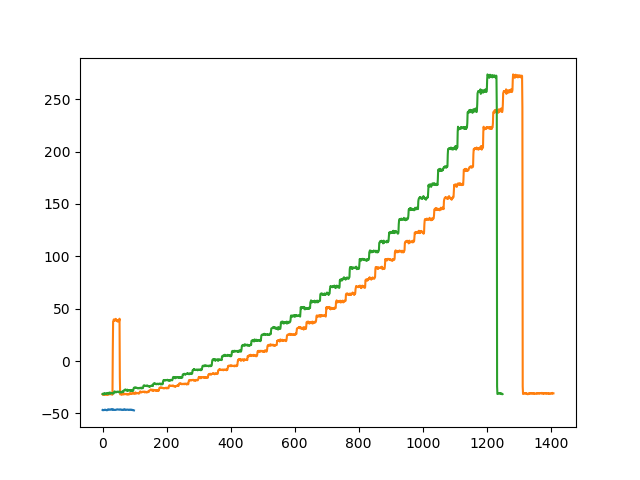

In [9]:
plt.plot(baseAvg)

In [11]:
calibPath = os.path.join(folderPath, 'Run1_00001.tif')
calib = tifffile.imread(calibPath)

In [17]:
1285 - 30*40

85

In [ ]:
ca

In [15]:
np.diff(np.array([191,221,252,283,313,344,375,406]))

array([30, 31, 31, 30, 31, 31, 31])

In [12]:
calib.shape

(1409L, 512L, 512L)

In [13]:
calib_avg = calib.mean(axis=(1,2))

In [19]:
80+41*30.5

1330.5

In [20]:
calib_crop = calib_avg[80:1330]

<IPython.core.display.Javascript object>


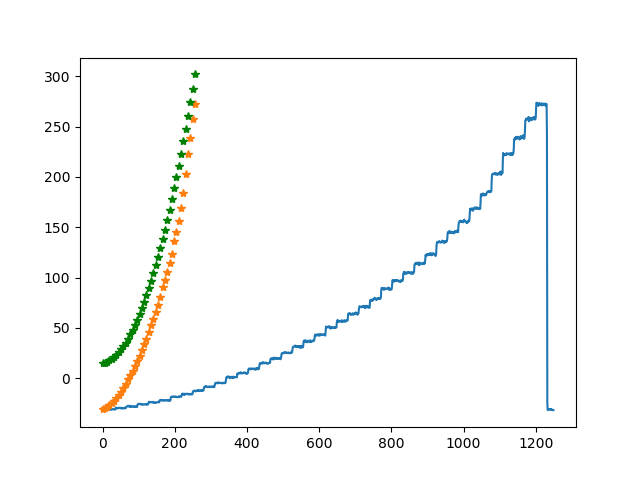

In [22]:
%matplotlib notebook
plt.plot(calib_crop)

In [36]:
offset=3
#data = np.random.rand(px, px, framerate*trial_length*n_trials)
avg = np.zeros((n_trials))
for i in range(n_trials):
    start = i * trial_frames + offset
    end = (i + 1) * trial_frames - offset
    avg[i] = np.median(calib_crop[start:end])

In [37]:
base_median

-46.0

In [38]:
avg_new = avg -  base_median

In [39]:
avg_new

array([  15.02024269,   16.52166557,   18.07415581,   20.21774483,
         22.14221191,   24.09229469,   27.52039528,   30.31386948,
         33.41012001,   37.41628838,   41.11919403,   46.77616882,
         50.46458054,   54.92170334,   58.76311111,   63.12348747,
         66.91127014,   72.08906746,   78.06015205,   83.51699448,
         89.5755043 ,   96.71004295,  103.4221344 ,  110.59986115,
        117.48637009,  125.16759682,  134.95954895,  142.96614838,
        150.9924984 ,  159.97365952,  169.07495308,  181.32779884,
        191.22559738,  201.75509453,  214.84301758,  230.29853249,
        249.07051659,  268.37349701,  285.05501175,  303.21023941,
        317.8360405 ])

In [40]:
myfit = GammaCalculator(inputs=lum_values, lums=avg_new, eq=4)


In [47]:
 myfit.gamma, myfit.a,myfit.b, myfit.k, 

(2.2184774622734271, 13.883149718972277, 1.059621035252545, 11.796792449378628)

In [42]:
lum_values2 = np.linspace(0, 1, n_trials)

In [43]:
pridectd = myfit.a + (myfit.b +myfit.k*lum_values2)**myfit.gamma

<IPython.core.display.Javascript object>


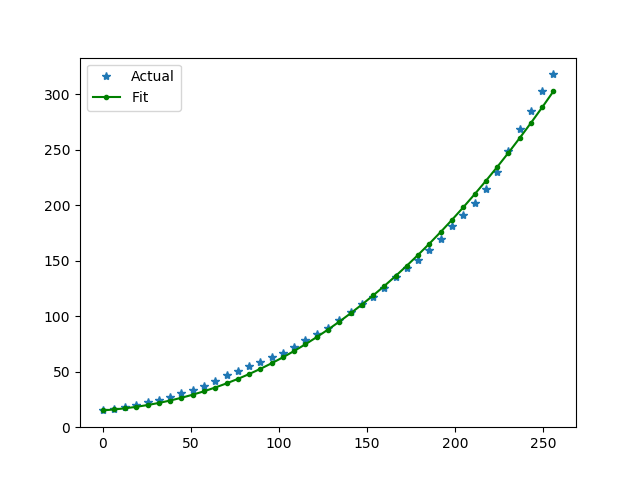

In [46]:
%matplotlib notebook
plt.plot(lum_values, avg_new, '*')
plt.plot(lum_values, pridectd, '.-g')
plt.legend(['Actual','Fit'])